In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()
X1 = dataset["data"]
y1 = dataset["target"]
feature_names1 = dataset["feature_names"]


In [3]:
df=pd.DataFrame(data=X1,columns=feature_names1)

In [4]:
df['y']=y1

In [5]:
df.shape #There are available 178 records

(178, 14)

In [6]:
df.isna().sum() #There are not missiing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
y                               0
dtype: int64

In [7]:
df['y'].value_counts() #Number of elements for every class

y
1    71
0    59
2    48
Name: count, dtype: int64

In [8]:
tr=DecisionTreeClassifier()

In [9]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
tr.fit(X1,y1)

DecisionTreeClassifier()

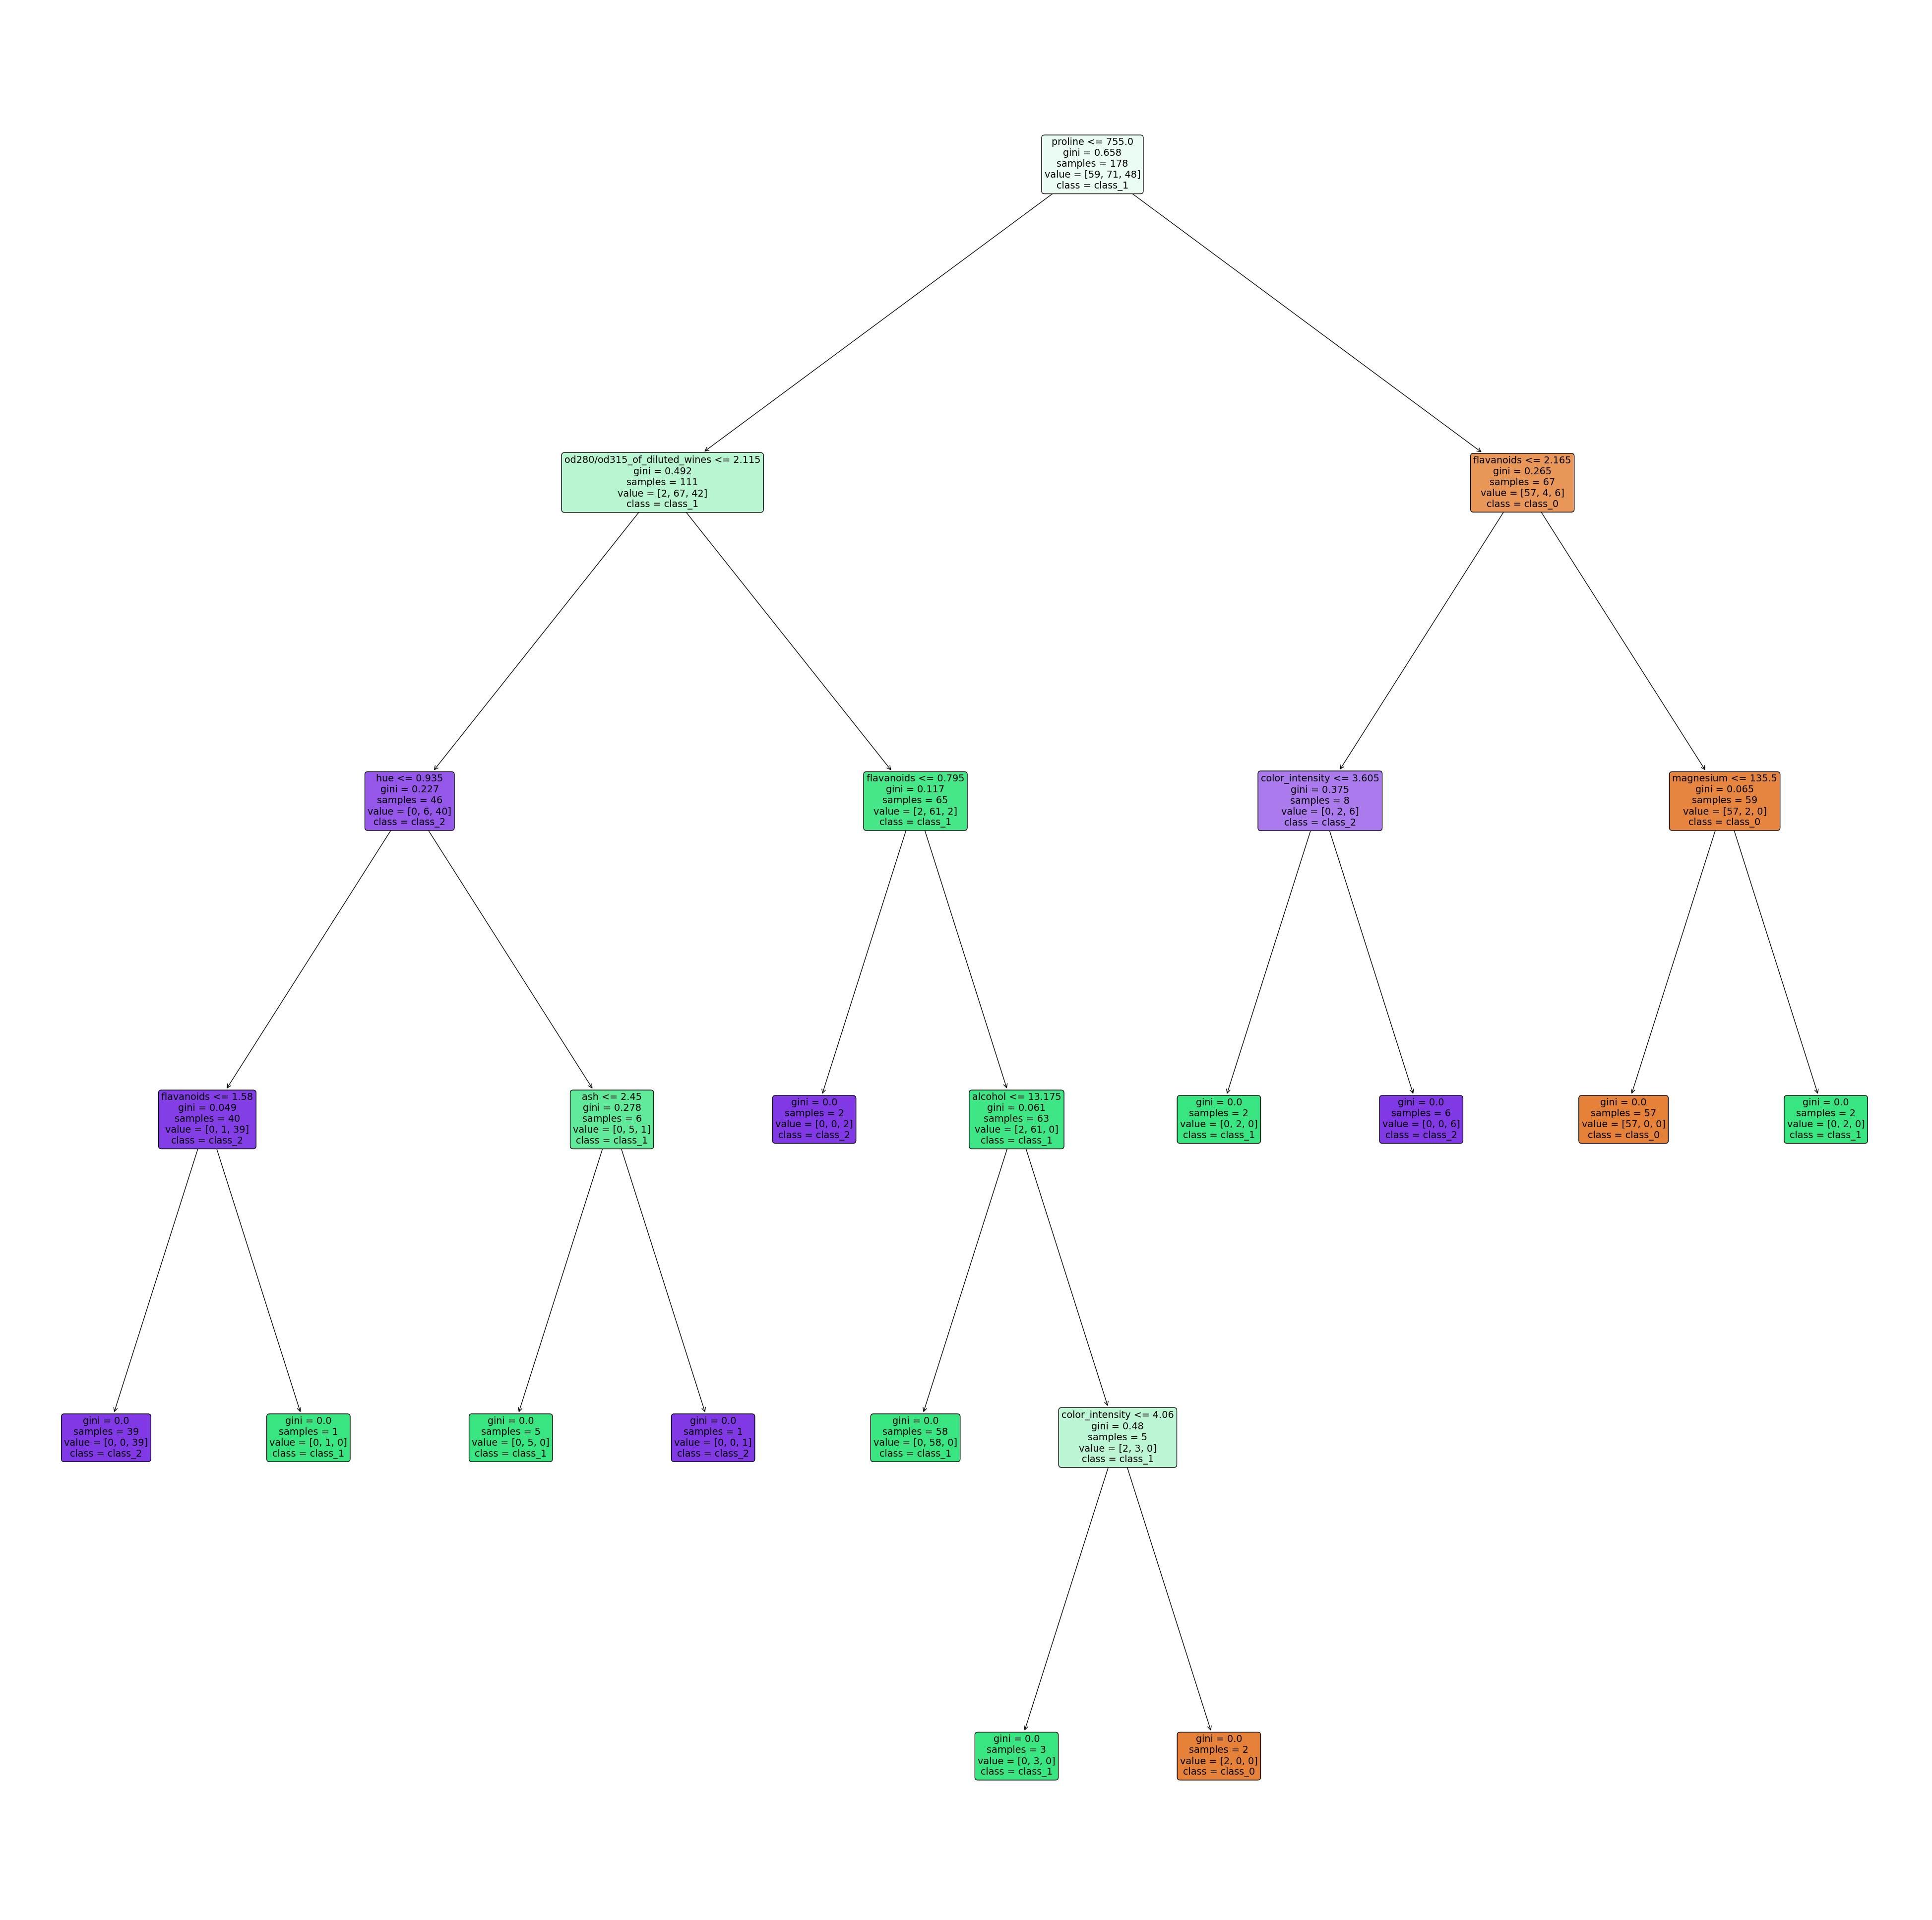

In [11]:
plt.figure(figsize=(50, 50))
plot_tree(tr, filled=True, feature_names=feature_names1 , class_names=list(dataset.target_names), rounded=True)
plt.show()

#From the desicion tree we can say that the tree is starting by the last feature that is the proline, depending if the value get a proline less or equal to 755, we will analize another 2 features.
# with respect to the overfiting, in the last nodes of the tree, there are pretty little samples in the class 2 and 1 with respect to the class 0 if we take the way of flavonids and color_intensity but in the other side we use a lot of features and the samples are really short

In [12]:
pred=tr.predict(X1)

In [13]:
accuracy_score(y1,pred) #This result is a clear overfiting case, because the predictions and the y are exactly the same

1.0

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X1,y1,test_size=0.2)

In [15]:
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=tr.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred) #This is a good result

0.9166666666666666

In [18]:
metrics=classification_report(y_test,y_pred)

In [19]:
metrics

'              precision    recall  f1-score   support\n\n           0       1.00      0.86      0.92        14\n           1       0.83      1.00      0.91        15\n           2       1.00      0.86      0.92         7\n\n    accuracy                           0.92        36\n   macro avg       0.94      0.90      0.92        36\nweighted avg       0.93      0.92      0.92        36\n'

In [20]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [21]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X1,y1,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]


In [22]:
#Now we are gonna make the decision tree with some changes in the parameters
from sklearn.model_selection import ParameterGrid
params = {
"max_depth": [None, 2, 4, 8],
"splitter": ["best", "random"],
"max_features":[13,7,3,10],
"ccp_alpha":[0,0.3,0.6,0.8]
}

max_accuracy = 0
best_config = None

for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_valid)
    val=(accuracy_score(y_valid,y_pred))

    for key, value in config.items():
        print(f"{key}: {value}")

    if val > max_accuracy:
            max_accuracy = val
            best_config = config
    

ccp_alpha: 0
max_depth: None
max_features: 13
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 13
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 7
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 7
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 3
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 3
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 10
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 10
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 13
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 13
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 7
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 7
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 3
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 3
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 10
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 10
splitter: random
ccp_alpha: 0
max_depth: 4
max_features: 

In [23]:
print("Best Configuration:")
for key, value in best_config.items():
    print(f"{key}: {value}")
print(f"Best Accuracy: {max_accuracy:.4f}")

Best Configuration:
ccp_alpha: 0
max_depth: None
max_features: 13
splitter: random
Best Accuracy: 1.0000


In [24]:
syn=pd.read_csv("https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv")

In [25]:
syn
Xs=syn.loc[:,:'x1']
ys=syn.loc[:,'label']

In [26]:
syn

,x0,x1,label
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0
...,...,...,...
495,4.995458,8.437083,0
496,6.636632,9.931535,0
497,6.373259,8.098388,0
498,1.230331,7.169844,1


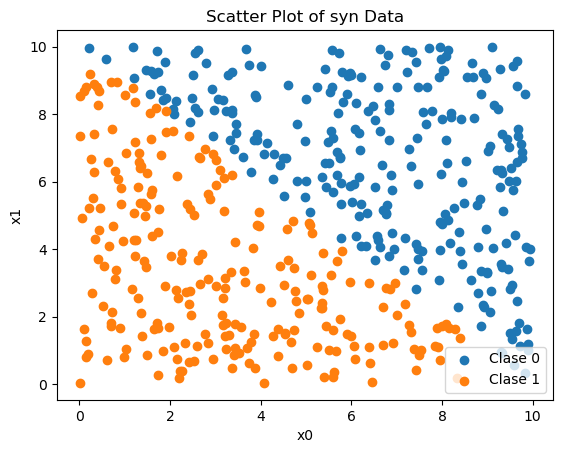

'\nplt.scatter(Xs[\'x0\'], Xs[\'x1\'],  c=ys, label="Clase 0")\nplt.scatter(Xs[\'x0\'], Xs[\'x1\'],  c=ys, label="Clase 0")\nplt.xlabel(\'x0\')\nplt.ylabel(\'x1\')\nplt.title(\'Scatter Plot of syn Data\')\nplt.legend()\n#plt.legend(ys)\nplt.show()\n'

In [27]:
mask_0 = ys == 0
mask_1 = ys == 1

plt.scatter(Xs[mask_0]['x0'], Xs[mask_0]['x1'], label="Clase 0")
plt.scatter(Xs[mask_1]['x0'], Xs[mask_1]['x1'], label="Clase 1")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Scatter Plot of syn Data')
plt.legend()
#plt.legend(ys)
plt.show()

"""
plt.scatter(Xs['x0'], Xs['x1'],  c=ys, label="Clase 0")
plt.scatter(Xs['x0'], Xs['x1'],  c=ys, label="Clase 0")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Scatter Plot of syn Data')
plt.legend()
#plt.legend(ys)
plt.show()
"""


In [28]:
pt=DecisionTreeClassifier()

In [29]:
pt.fit(Xs,ys)


DecisionTreeClassifier()

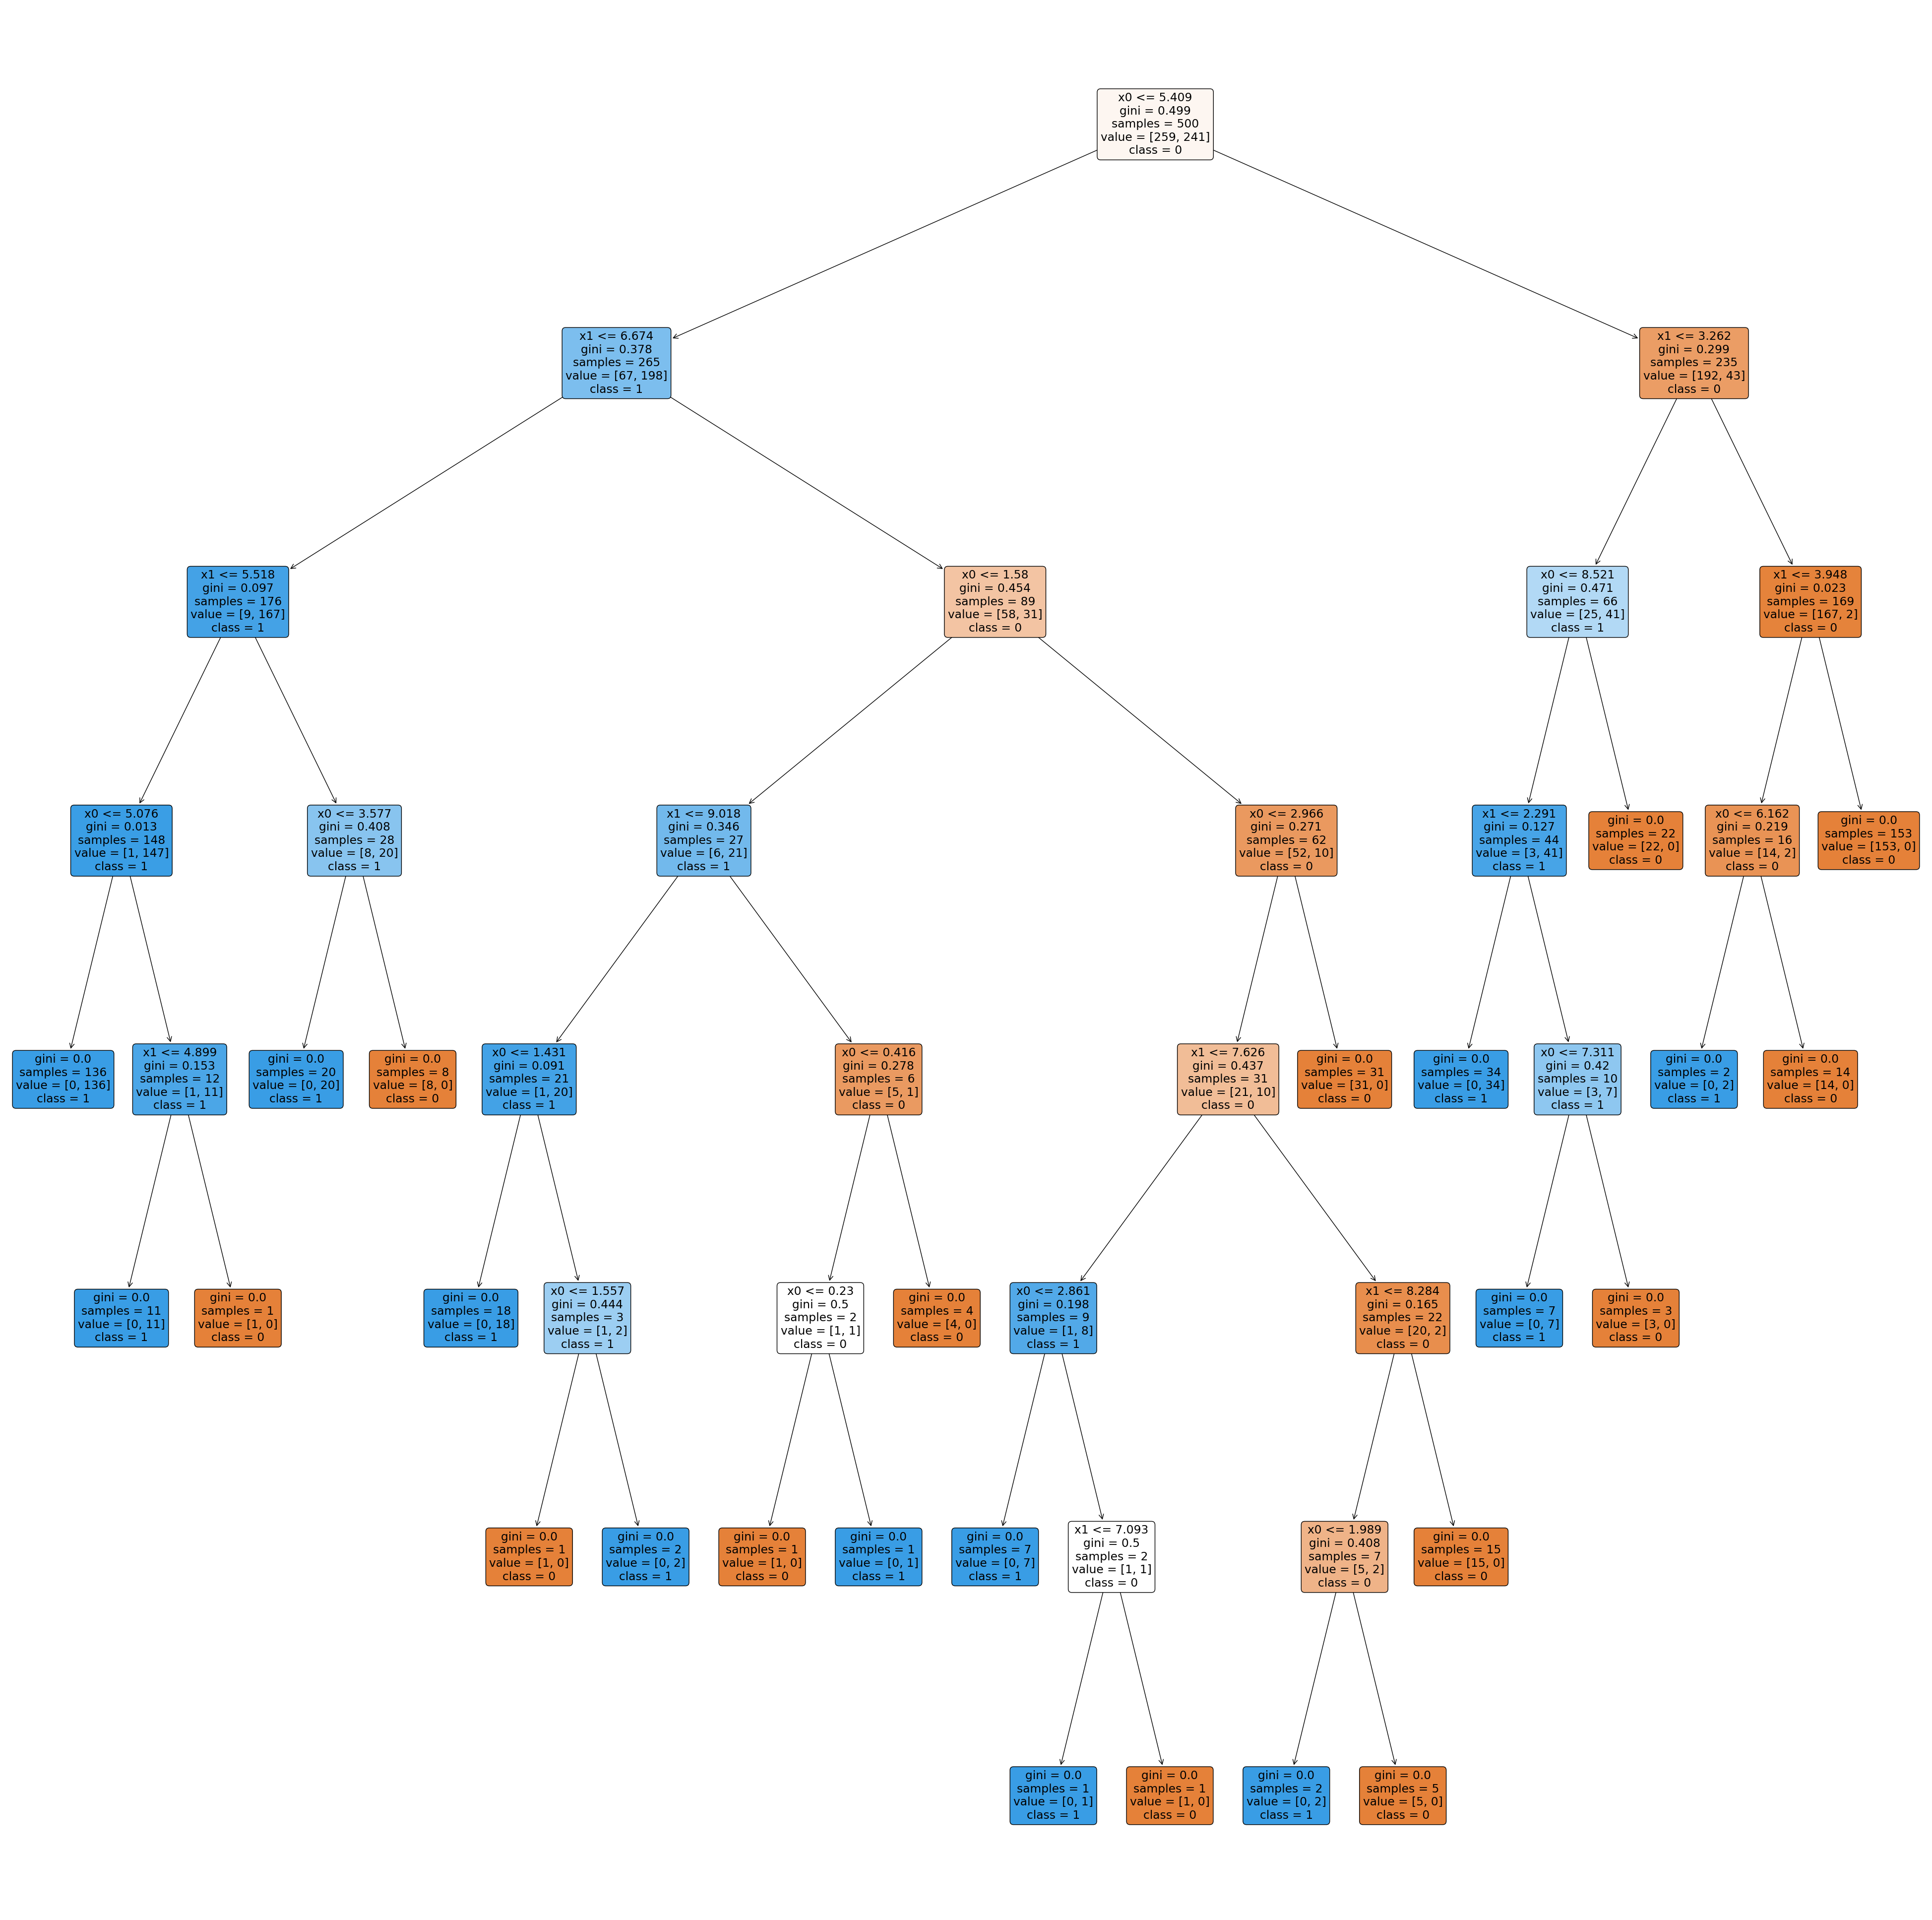

In [30]:
plt.figure(figsize=(50, 50))
plot_tree(pt, filled=True, feature_names=['x0','x1'] , class_names=['0','1'], rounded=True)
plt.show() #The tree is learning the division of the data



In [31]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"]


c:\Users\mateo\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [32]:
#Load the MNIST dataset into memory. Divide the 70,000 digits you have into a training set (60,000
#digits) and a test set (10,000 digits)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000)

In [33]:
a=DecisionTreeClassifier()

In [34]:
a.fit(X_train,y_train)
y_pred=a.predict(X_test)
accuracy_score(y_test,y_pred)

0.8744

In [39]:
y_pred.reshape(-1,1)

array([['2'],
       ['0'],
       ['1'],
       ...,
       ['6'],
       ['5'],
       ['3']], dtype=object)

In [35]:
X1.shape[0]

178

In [49]:
class MyRandomForestClassifer():
    def __init__(self,n_estimators,max_feautures):
        self.n=n_estimators#This is the number of trees used
        self.f=max_feautures#The max_feautures are based on the size of the subset of feautures, will be selected to make the split
        self.random_forest=[]

    #train the trees of this random forest using subsets of X (and y)

    def fit(self,X,y): #each n_estimator will have its own subset of data 
        import random as rn
        from math import ceil

        for i in range(self.n):
            # Let's sample the training set
            sample_indices = np.random.choice(X.shape[0], ceil(X.shape[0] * 0.632), replace=True)

            X_train_temp = X[sample_indices] #The x is filtered by the sample N and B
            y_train_temp = y[sample_indices]

            self.random_forest.append(DecisionTreeClassifier(max_features=self.f).fit(X_train_temp,y_train_temp))

        return self

    #predict the label for each point in X
    def predict(self,X): #each n_estimator must make a prediction
        from collections import Counter
        #the class selected by the highest number of trees is selected
        predictions = np.array([decision_tree_fitted.predict(X) for decision_tree_fitted in self.random_forest]).T
        final_predictions = [Counter(prediction).most_common(1)[0][0] for prediction in predictions]
        
        return np.array(final_predictions)

        

In [40]:
from collections import Counter

In [48]:
z = [0,1,1,0,1]
Counter(z).most_common(1)

[(1, 3)]

In [ ]:
X1[:,[1,3]]

array([[ 1.71, 15.6 ],
       [ 1.78, 11.2 ],
       [ 2.36, 18.6 ],
       [ 1.95, 16.8 ],
       [ 2.59, 21.  ],
       [ 1.76, 15.2 ],
       [ 1.87, 14.6 ],
       [ 2.15, 17.6 ],
       [ 1.64, 14.  ],
       [ 1.35, 16.  ],
       [ 2.16, 18.  ],
       [ 1.48, 16.8 ],
       [ 1.73, 16.  ],
       [ 1.73, 11.4 ],
       [ 1.87, 12.  ],
       [ 1.81, 17.2 ],
       [ 1.92, 20.  ],
       [ 1.57, 20.  ],
       [ 1.59, 16.5 ],
       [ 3.1 , 15.2 ],
       [ 1.63, 16.  ],
       [ 3.8 , 18.6 ],
       [ 1.86, 16.6 ],
       [ 1.6 , 17.8 ],
       [ 1.81, 20.  ],
       [ 2.05, 25.  ],
       [ 1.77, 16.1 ],
       [ 1.72, 17.  ],
       [ 1.9 , 19.4 ],
       [ 1.68, 16.  ],
       [ 1.5 , 22.5 ],
       [ 1.66, 19.1 ],
       [ 1.83, 17.2 ],
       [ 1.53, 19.5 ],
       [ 1.8 , 19.  ],
       [ 1.81, 20.5 ],
       [ 1.64, 15.5 ],
       [ 1.65, 18.  ],
       [ 1.5 , 15.5 ],
       [ 3.99, 13.2 ],
       [ 1.71, 16.2 ],
       [ 3.84, 18.8 ],
       [ 1.89, 15.  ],
       [ 3.